In [5]:
import urllib
import numpy as np
import pandas as pd
import csv
import time
import datetime
import os
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt 
%matplotlib inline 

Download data from url to the chosen directory. If directory is not dpecified, creates 'csv' directory in current working directory and downloads files there. Files are named like "2018_02_11-09h_vhi_id_01.csv". Number of files is equal to the number of regions

In [5]:
def download(directory='/csv'):
    os.chdir('/home/salamander/Documents/univ_ds/lab1/lab1')
    if not os.path.isdir(os.getcwd() + directory):
        os.makedirs(os.getcwd() + directory)
        directory = os.getcwd() + directory
    os.chdir(directory)
    for ident in range(1, 28):
        url="https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_provinceData.php?country=UKR&provinceID=%02d&year1=1981&year2=2018&type=Mean"%ident
        vhi_url = urllib.request.urlopen(url)
        now=datetime.datetime.now().strftime("%Y_%m_%d-%Hh")
        out = open('vhi_id_%02d.csv' %ident,'wb')
        out.write(vhi_url.read())
        out.close()  
        os.rename('vhi_id_%02d.csv' %ident, now+'_vhi_id_%02d.csv' %ident)
        print ("VHI "+ str(ident) +" is downloaded...")
    return directory

In [6]:
download()

VHI 1 is downloaded...
VHI 2 is downloaded...
VHI 3 is downloaded...
VHI 4 is downloaded...
VHI 5 is downloaded...
VHI 6 is downloaded...
VHI 7 is downloaded...
VHI 8 is downloaded...
VHI 9 is downloaded...
VHI 10 is downloaded...
VHI 11 is downloaded...
VHI 12 is downloaded...
VHI 13 is downloaded...
VHI 14 is downloaded...
VHI 15 is downloaded...
VHI 16 is downloaded...
VHI 17 is downloaded...
VHI 18 is downloaded...
VHI 19 is downloaded...
VHI 20 is downloaded...
VHI 21 is downloaded...
VHI 22 is downloaded...
VHI 23 is downloaded...
VHI 24 is downloaded...
VHI 25 is downloaded...
VHI 26 is downloaded...
VHI 27 is downloaded...


'/home/salamander/Documents/univ_ds/lab1/lab1/csv'

Creates empty dictionary, where dataframes will be stacked (1 dataframe for 1 region)

In [14]:
dataframes = {}

New names of regions to be assigned, according to lab's task

In [15]:
region_names = { 1: 'Vinnitsa', 2: 'Volyn', 3: 'Dnipropetrovsk', 4: 'Donetsk', 5: 'Zhitomir', 6: 'Zakarpatya', 
                 7: 'Zaporizhya', 8: 'Iv-Frankivsk', 9: 'Kyiv', 10: 'Kirovograd', 11: 'Luhansk', 12: 'Lviv',
                 13: 'Mikolaiv', 14: 'Odessa', 15: 'Poltava', 16: 'Rivne', 17: 'Sumi', 18: 'Ternopil',
                 19: 'Kharkiv', 20: 'Kherson', 21: 'Khmelnitskii', 22: 'Cherkasy', 23: 'Chernivtsii', 24: 'Chernigiv',
                 25: 'Krim'}

List to change region indexes to those, specified in task #3

'100' is used to mark those two regions that will be deleted from dictionary later. 

In [16]:
mapping_list = [21, 22, 20, 21, -2, -2, 1, 11, 11, 11, -2, 100,
                -3, -3, -3, -3, -3, -3, -3, 100, -4, -4, -17, -23, -23, -19, -22]
len(mapping_list)

27

Read CSV file into DataFrame with pandas https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html and add to dict dataframes (key = number of the region on the site), delete 2 explicit regions

In [17]:
def to_df_to_dict(path, region):
        df = pd.read_csv(path,index_col=False, skiprows=1,
                         sep=r'\s+,*|,\s*', 
                         names=['year', 'week', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI'], engine = 'python')
        df = df[(df['VHI'] >= 0) & (df['VHI'] <= 100)]
        df['region'] = np.full(len(df['year']), region) 
        df['region name'] = np.full(len(df['year']), region_names[region])
        df.index +=1
        dataframes[region] = df
        

In [18]:
for region in range(1, 28):
    path= '/home/salamander/Documents/univ_ds/lab1/lab1/csv'+ '/2018_02_18-16h_vhi_id_%02d.csv' %region
    new_region = region + mapping_list[region-1]
    if new_region > 100:
        continue
    to_df_to_dict(path, new_region)

In [19]:
dataframes[5]

,year,week,SMN,SMT,VCI,TCI,VHI,region,region name
1,1981,35.0,0.297,288.01,13.95,92.16,53.05,5,Zhitomir
2,1981,36.0,0.299,288.86,21.34,75.21,48.27,5,Zhitomir
3,1981,37.0,0.298,289.12,29.67,58.09,43.88,5,Zhitomir
4,1981,38.0,0.296,289.01,37.85,43.42,40.64,5,Zhitomir
5,1981,39.0,0.290,288.21,45.29,31.41,38.35,5,Zhitomir
6,1981,40.0,0.278,286.72,49.07,26.40,37.74,5,Zhitomir
7,1981,41.0,0.258,284.37,48.74,30.18,39.46,5,Zhitomir
8,1981,42.0,0.225,281.28,43.79,42.90,43.35,5,Zhitomir
9,1981,43.0,0.187,278.05,35.41,55.86,45.64,5,Zhitomir
10,1981,44.0,0.152,274.90,29.15,58.12,43.64,5,Zhitomir


Stack all dataframes into one huge dataframe

In [20]:
global_df = pd.concat(dataframes)

For future use with statistical/math functions making some of the columns numerical (float64)

In [21]:
global_df[['year', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI', 'region']] = global_df[['year', 'SMN', 'SMT', 'VCI', 'TCI', 'VHI', 'region']].apply(pd.to_numeric)

Displays VHI for region for a chosen year. Finds min and max 


In [57]:
def vhi_region_year(final_df, year, region):
    df = final_df[final_df['region'] == region]
    df1 = df[df['year'] == year]
    df1 = df1[['week', 'VHI']]
    print (df1)
    print ('Maximun VHI is {max_value}'.format(max_value=df1.VHI.max(axis=0)))
    print ('Minimum VHI is {min_value}'.format(min_value=df1.VHI.min(axis=0)))
    return df1
   


In [61]:
try1 = vhi_region_year(global_df, 2016, 13)

         week    VHI
13 1735   1.0  42.10
   1736   2.0  46.20
   1737   3.0  46.50
   1738   4.0  45.35
   1739   5.0  42.92
   1740   6.0  39.65
   1741   7.0  36.68
   1742   8.0  34.41
   1743   9.0  33.75
   1744  10.0  32.56
   1745  11.0  31.29
   1746  12.0  31.99
   1747  13.0  33.26
   1748  14.0  35.49
   1749  15.0  39.16
   1750  16.0  43.43
   1751  17.0  50.42
   1752  18.0  60.29
   1753  19.0  67.47
   1754  20.0  70.31
   1755  21.0  72.22
   1756  22.0  72.98
   1757  23.0  73.85
   1758  24.0  74.58
   1759  25.0  74.51
   1760  26.0  73.76
   1761  27.0  71.70
   1762  28.0  67.55
   1763  29.0  63.94
   1764  30.0  59.46
   1765  31.0  55.81
   1766  32.0  53.44
   1767  33.0  51.07
   1768  34.0  48.25
   1769  35.0  43.83
   1770  36.0  36.16
   1771  37.0  30.43
   1772  38.0  28.75
   1773  39.0  32.55
   1774  40.0  38.59
   1775  41.0  42.60
   1776  42.0  43.13
   1777  43.0  40.49
   1778  44.0  36.76
   1779  45.0  36.94
   1780  46.0  38.30
   1781  47.0

In [60]:
try1 = (df.groupby(['', 'org'], as_index=False).mean()
            .groupby('cluster')['time'].mean())

         week    VHI
13 1735   1.0  42.10
   1736   2.0  46.20
   1737   3.0  46.50
   1738   4.0  45.35
   1739   5.0  42.92
   1740   6.0  39.65
   1741   7.0  36.68
   1742   8.0  34.41
   1743   9.0  33.75
   1744  10.0  32.56
   1745  11.0  31.29
   1746  12.0  31.99
   1747  13.0  33.26
   1748  14.0  35.49
   1749  15.0  39.16
   1750  16.0  43.43
   1751  17.0  50.42
   1752  18.0  60.29
   1753  19.0  67.47
   1754  20.0  70.31
   1755  21.0  72.22
   1756  22.0  72.98
   1757  23.0  73.85
   1758  24.0  74.58
   1759  25.0  74.51
   1760  26.0  73.76
   1761  27.0  71.70
   1762  28.0  67.55
   1763  29.0  63.94
   1764  30.0  59.46
   1765  31.0  55.81
   1766  32.0  53.44
   1767  33.0  51.07
   1768  34.0  48.25
   1769  35.0  43.83
   1770  36.0  36.16
   1771  37.0  30.43
   1772  38.0  28.75
   1773  39.0  32.55
   1774  40.0  38.59
   1775  41.0  42.60
   1776  42.0  43.13
   1777  43.0  40.49
   1778  44.0  36.76
   1779  45.0  36.94
   1780  46.0  38.30
   1781  47.0

week    26.500000
VHI     47.357692
dtype: float64

Finds years with extreme droughts in chosen region

In [75]:
def vhi_region_extreme(global_df, region, percent=15):
    df = global_df[global_df['region'] == region]
    print(df[['year', 'VHI']])
    print ('{ident} region over {percent} %'.format(ident = region, percent = percent))
    df1 = df[df['VHI'] < percent]
    df2 = df1[['year', 'VHI']]
    print (df2)
    print ('Years: {years}'.format(years = pd.unique(df2.year.ravel())))

In [76]:
vhi_region_extreme(global_df, region=2)

        year    VHI
2 1     1981  51.91
  2     1981  46.05
  3     1981  40.51
  4     1981  38.44
  5     1981  39.28
  6     1981  41.65
  7     1981  46.28
  8     1981  52.01
  9     1981  55.16
  10    1981  55.46
  11    1981  55.01
  12    1981  54.91
  13    1981  56.51
  14    1981  57.79
  15    1981  57.50
  16    1981  56.32
  17    1981  57.32
  18    1981  56.87
  19    1982  53.88
  20    1982  50.97
  21    1982  45.65
  22    1982  40.04
  23    1982  36.44
  24    1982  35.14
  25    1982  33.57
  26    1982  33.23
  27    1982  33.53
  28    1982  35.07
  29    1982  36.79
  30    1982  38.65
...      ...    ...
  1814  2017  55.55
  1815  2017  57.00
  1816  2017  58.43
  1817  2017  57.15
  1818  2017  55.83
  1819  2017  56.85
  1820  2017  58.24
  1821  2017  55.82
  1822  2017  55.04
  1823  2017  57.14
  1824  2017  57.44
  1825  2017  58.62
  1826  2017  57.90
  1827  2017  57.40
  1828  2017  55.80
  1829  2017  53.39
  1830  2017  51.33
  1831  2017  49.21


Find years with mild droughts in chosen region

In [77]:
def vhi_region_light(global_df, region, percent_low=15, percent_high=35):
    df = global_df[global_df['region'] == region]
    print(df[['year', 'VHI']])
    print ('{ident} region over {percent} %'.format(ident = region, percent = percent_low))
    df1 = df[(df['VHI'] < percent_high) & (df['VHI'] > percent_low)]
    df2 = df1[['year', 'VHI']]
    print (df2)
    print ('Years: {years}'.format(years = pd.unique(df2.year.ravel())))

In [78]:
vhi_region_light(global_df, region=2)

        year    VHI
2 1     1981  51.91
  2     1981  46.05
  3     1981  40.51
  4     1981  38.44
  5     1981  39.28
  6     1981  41.65
  7     1981  46.28
  8     1981  52.01
  9     1981  55.16
  10    1981  55.46
  11    1981  55.01
  12    1981  54.91
  13    1981  56.51
  14    1981  57.79
  15    1981  57.50
  16    1981  56.32
  17    1981  57.32
  18    1981  56.87
  19    1982  53.88
  20    1982  50.97
  21    1982  45.65
  22    1982  40.04
  23    1982  36.44
  24    1982  35.14
  25    1982  33.57
  26    1982  33.23
  27    1982  33.53
  28    1982  35.07
  29    1982  36.79
  30    1982  38.65
...      ...    ...
  1814  2017  55.55
  1815  2017  57.00
  1816  2017  58.43
  1817  2017  57.15
  1818  2017  55.83
  1819  2017  56.85
  1820  2017  58.24
  1821  2017  55.82
  1822  2017  55.04
  1823  2017  57.14
  1824  2017  57.44
  1825  2017  58.62
  1826  2017  57.90
  1827  2017  57.40
  1828  2017  55.80
  1829  2017  53.39
  1830  2017  51.33
  1831  2017  49.21


EXTRA TASK: ADDING NEW DATA (PERCENT OF REGION) TO THE EXISTING ONE + plot histogram of data

In [3]:
def download_percent(directory='/region'):
    os.chdir('/home/salamander/Documents/univ_ds/lab1/lab1')
    if not os.path.isdir(os.getcwd() + directory):
        os.makedirs(os.getcwd() + directory)
        directory = os.getcwd() + directory
    os.chdir(directory)
    for ident in range(1, 28):
        url="https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_provinceData.php?country=UKR&provinceID=%02d&year1=1981&year2=2018&type=VHI_Parea"%ident
        vhi_url = urllib.request.urlopen(url)
        now=datetime.datetime.now().strftime("%Y_%m_%d-%Hh")
        out = open('vhi_id_%02d.csv' %ident,'wb')
        out.write(vhi_url.read())
        out.close()  
        os.rename('vhi_id_%02d.csv' %ident, now+'_vhi_id_%02d.csv' %ident)
        print ("VHI "+ str(ident) +" is downloaded...")
    return directory

In [4]:
download_percent()

VHI 1 is downloaded...
VHI 2 is downloaded...
VHI 3 is downloaded...
VHI 4 is downloaded...
VHI 5 is downloaded...
VHI 6 is downloaded...
VHI 7 is downloaded...
VHI 8 is downloaded...
VHI 9 is downloaded...
VHI 10 is downloaded...
VHI 11 is downloaded...
VHI 12 is downloaded...
VHI 13 is downloaded...
VHI 14 is downloaded...
VHI 15 is downloaded...
VHI 16 is downloaded...
VHI 17 is downloaded...
VHI 18 is downloaded...
VHI 19 is downloaded...
VHI 20 is downloaded...
VHI 21 is downloaded...
VHI 22 is downloaded...
VHI 23 is downloaded...
VHI 24 is downloaded...
VHI 25 is downloaded...
VHI 26 is downloaded...
VHI 27 is downloaded...


'/home/salamander/Documents/univ_ds/lab1/lab1/region'

In [22]:
dataframes_percent = {}

In [25]:
def to_df_to_dict(path, region):
        df = pd.read_csv(path,index_col=False, skiprows=1,
                         sep=r'\s+,*|,\s*', 
                         names=['year', 'week', 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70,
                               75, 80, 85, 90, 95, 100], engine = 'python')
        df = df[(df[0] >= 0) & (df[0] <= 100)]
        df['region'] = np.full(len(df['year']), region) 
        df['region name'] = np.full(len(df['year']), region_names[region])
        df.index +=1
        dataframes_percent[region] = df

In [26]:
for region in range(1, 28):
    path= '/home/salamander/Documents/univ_ds/lab1/lab1/region'+ '/2018_02_18-16h_vhi_id_%02d.csv' %region
    new_region = region + mapping_list[region-1]
    if new_region > 100:
        continue
    to_df_to_dict(path, new_region)

In [27]:
dataframes_percent[5]

,year,week,0,5,10,15,20,25,30,35,...,65,70,75,80,85,90,95,100,region,region name
1,1981,35.0,0.00,0.00,0.00,0.04,0.36,0.98,2.36,3.88,...,5.69,3.37,1.99,0.83,0.07,0.07,0.00,0.0,5,Zhitomir
2,1981,36.0,0.00,0.04,0.29,0.94,2.10,3.23,6.52,10.11,...,3.95,1.74,0.69,0.51,0.07,0.04,0.00,0.0,5,Zhitomir
3,1981,37.0,0.07,0.29,1.01,1.63,3.19,5.76,10.55,15.11,...,2.14,0.94,0.62,0.07,0.00,0.00,0.00,0.0,5,Zhitomir
4,1981,38.0,0.22,0.72,1.63,2.65,5.15,8.63,11.85,16.20,...,1.41,0.47,0.14,0.07,0.00,0.00,0.00,0.0,5,Zhitomir
5,1981,39.0,0.25,0.76,1.74,3.84,6.81,10.58,13.16,17.07,...,0.80,0.25,0.07,0.00,0.00,0.00,0.00,0.0,5,Zhitomir
6,1981,40.0,0.14,0.69,1.38,3.33,6.71,11.20,15.19,18.56,...,0.47,0.04,0.00,0.00,0.00,0.00,0.00,0.0,5,Zhitomir
7,1981,41.0,0.04,0.25,0.91,2.03,4.13,9.35,15.40,19.75,...,0.58,0.11,0.00,0.00,0.00,0.00,0.00,0.0,5,Zhitomir
8,1981,42.0,0.00,0.04,0.07,0.54,2.54,5.18,11.05,16.20,...,1.05,0.43,0.04,0.00,0.00,0.00,0.00,0.0,5,Zhitomir
9,1981,43.0,0.00,0.00,0.04,0.07,0.91,3.48,8.37,15.15,...,1.27,0.43,0.22,0.04,0.00,0.00,0.00,0.0,5,Zhitomir
10,1981,44.0,0.00,0.00,0.00,0.36,1.45,5.51,13.48,16.71,...,1.56,0.47,0.07,0.00,0.00,0.00,0.00,0.0,5,Zhitomir


In [28]:
global_df_percent = pd.concat(dataframes_percent)

Concatanate dataframe with mean values and dataframe with percents

In [35]:
final_df = pd.concat([global_df.iloc[:,:-2], global_df_percent.iloc[:,2:]], axis=1)

In [37]:
final_df.columns

Index([       'year',        'week',         'SMN',         'SMT',
               'VCI',         'TCI',         'VHI',             0,
                   5,            10,            15,            20,
                  25,            30,            35,            40,
                  45,            50,            55,            60,
                  65,            70,            75,            80,
                  85,            90,            95,           100,
            'region', 'region name'],
      dtype='object')

In [38]:
final_df.head()

year  week    SMN     SMT    VCI    TCI    VHI     0     5    10  \
1 1  1981  35.0  0.261  291.40   6.51  81.49  44.00  0.00  0.04  0.04   
  2  1981  36.0  0.262  291.76  12.24  64.35  38.30  0.04  0.38  1.92   
  3  1981  37.0  0.260  291.55  19.70  51.17  35.43  0.30  1.75  4.10   
  4  1981  38.0  0.255  290.86  26.27  43.07  34.67  1.45  2.26  4.69   
  5  1981  39.0  0.249  289.56  32.22  39.72  35.97  1.11  2.22  4.31   

        ...         65    70    75    80    85    90    95   100  region  \
1 1     ...       1.37  0.90  0.38  0.34  0.00  0.09  0.09  0.04       1   
  2     ...       2.01  0.81  0.34  0.34  0.13  0.17  0.00  0.00       1   
  3     ...       1.79  0.60  0.51  0.51  0.17  0.09  0.00  0.00       1   
  4     ...       1.92  0.98  0.38  0.34  0.17  0.09  0.00  0.00       1   
  5     ...       2.43  1.15  0.68  0.34  0.21  0.13  0.00  0.00       1   

     region name  
1 1     Vinnitsa  
  2     Vinnitsa  
  3     Vinnitsa  
  4     Vinnitsa  
  5     Vinnitsa  

[5 rows x 30 columns]

In [89]:
def plt_vhi(final_df, region=1):
    new_df = final_df[(final_df['region'] == region)]
    try1 = (new_df.groupby(['year'], as_index=False).mean().groupby('year')['VHI'].mean())
    plt.plot(try1) 
    plt.ylabel('Average VHI')
    plt.title('Average VHI index per year in %s'%region_names[region])
    plt.grid(True)

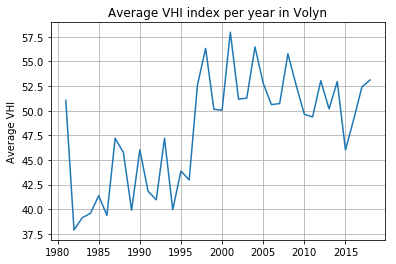

In [90]:
plt_vhi(final_df, region=2)

In [349]:
def plt_hist(final_df, region, year, week):
    perc = final_df[(final_df['region'] == region) & (final_df['year'] == year) & (final_df['week'] == week)]
    perc = perc.iloc[:, 7:-2]
    col = np.array(perc.columns)
    col = col.reshape(1,21)
    bins = col.ravel().tolist()
    x = perc.values.ravel().tolist()
    plt.hist(x, bins=bins, align = 'mid', color="grey", width=3)
    plt.title('VHI/percent of region histogram')
    plt.ylabel("Percent of the region with stated VHI")

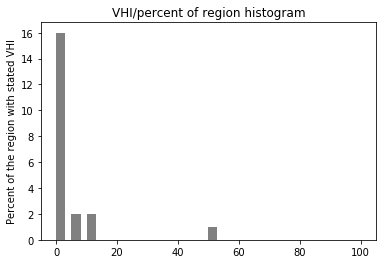

In [351]:
plt_hist(final_df, region =8, year=2007, week=3)

In [381]:
def cleaned_data(directory='/cleaned'):
    os.chdir('/home/salamander/Documents/univ_ds/lab1/lab1')
    if not os.path.isdir(os.getcwd() + directory):
        os.makedirs(os.getcwd() + directory)
    path = os.getcwd()+directory
    for ident in range(1, 26):
        df= final_df[final_df['region']==ident]
        df.to_csv(path+'/cleaned_region_'+str(ident)+'.csv', index=False)
    return directory

In [382]:
cleaned_data()

'/cleaned'

In [384]:
df3 = pd.read_csv('/home/salamander/Documents/univ_ds/lab1/lab1/cleaned/cleaned_region_3.csv')

In [385]:
df3

,year,week,SMN,SMT,VCI,TCI,VHI,0,5,10,...,65,70,75,80,85,90,95,100,region,region name
0,1981,35.0,0.199,294.30,12.12,91.24,51.68,0.00,0.00,0.00,...,4.55,3.46,1.28,0.82,0.39,0.12,0.00,0.04,3,Dnipropetrovsk
1,1981,36.0,0.210,294.65,23.08,78.13,50.60,0.00,0.00,0.04,...,5.64,3.69,2.18,1.28,0.70,0.23,0.12,0.04,3,Dnipropetrovsk
2,1981,37.0,0.214,294.30,33.95,64.52,49.24,0.00,0.04,0.12,...,5.29,3.07,1.55,1.20,1.05,0.16,0.04,0.04,3,Dnipropetrovsk
3,1981,38.0,0.216,293.48,45.28,53.08,49.18,0.00,0.19,0.16,...,5.09,2.29,2.10,0.86,0.54,0.19,0.08,0.00,3,Dnipropetrovsk
4,1981,39.0,0.213,292.04,54.78,45.00,49.89,0.00,0.08,0.16,...,5.91,3.19,1.71,0.66,0.16,0.04,0.00,0.00,3,Dnipropetrovsk
5,1981,40.0,0.209,289.95,62.60,41.77,52.19,0.00,0.00,0.08,...,6.76,4.55,1.71,0.66,0.12,0.00,0.00,0.00,3,Dnipropetrovsk
6,1981,41.0,0.202,287.27,67.46,40.94,54.20,0.00,0.00,0.00,...,9.87,5.60,2.10,0.58,0.12,0.08,0.00,0.00,3,Dnipropetrovsk
7,1981,42.0,0.189,284.34,69.00,41.39,55.19,0.00,0.00,0.00,...,10.38,5.87,2.80,1.09,0.19,0.12,0.00,0.00,3,Dnipropetrovsk
8,1981,43.0,0.174,281.47,68.14,41.27,54.70,0.00,0.00,0.00,...,9.76,5.13,2.45,0.82,0.23,0.12,0.00,0.00,3,Dnipropetrovsk
9,1981,44.0,0.152,278.18,63.88,40.21,52.05,0.00,0.00,0.00,...,6.37,3.65,1.24,0.54,0.04,0.08,0.00,0.00,3,Dnipropetrovsk
